In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

## Zadanie 1

1. Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [2]:
data = pd.read_csv('diabetes.xls')

In [3]:
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [4]:
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [5]:
corr = data.corr() # okreslenie korelacji Pearsona - można wskazać inną metodę: 'kendall' lub 'spearman'
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

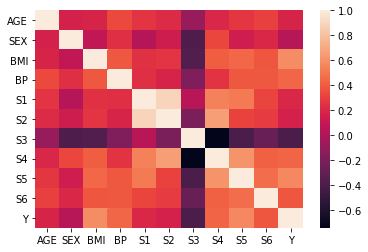

In [6]:
import seaborn as sns
sns.heatmap(corr,
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [7]:
choice = 'S5' #sprawdzałem 'z palca' wszystkie zmienne objasniające żeby znaleźc najwyższą R^2 - zgodnie z zadaniem

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data[[choice]], data[['Y']],
                                                    test_size = 0.2)
# jak sprawdzić dla wszystkich atrybutów jednym kodem? da się?
# głównie chodzi aby ocena wszystkich atrybutów była na teym samym zbiorze treningowym

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)
x = model.score(x_test, y_test)
x
# dzisiejszy wykład - 'bias variance tradeoff' - czy jest sens sprawdzać model.score dla x i y treningowych?

0.5247996338433409

In [11]:
prediction = model.predict(x_test) # prognozowanie
prediction[:10]

array([[190.39232066],
       [106.90313783],
       [ 88.44199414],
       [218.40877047],
       [143.84978029],
       [132.63021099],
       [155.98672392],
       [ 96.64965301],
       [219.44792016],
       [120.78552821]])

In [12]:
mse = list(np.mean((prediction - y_test) ** 2)) # sprawdzam bład średnich kwadratów żeby okreslić jakość modelu do porównania z kolejnym
mse

[4080.5577080255594]

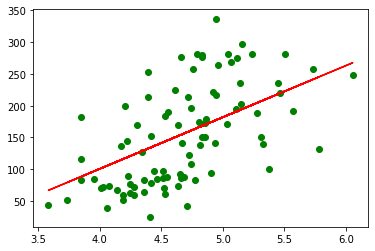

In [13]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, prediction, color = 'red')
plt.show()

# Porównanie

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data[['Y']], # z data usuwam ostanią kolumnę, która zawiera zmienną objaśnianą
                                                    test_size = 0.2)

In [15]:
model_all = LinearRegression()
model_all.fit(x_train, y_train)
y = model_all.score(x_test, y_test)
y

0.45833442096414745

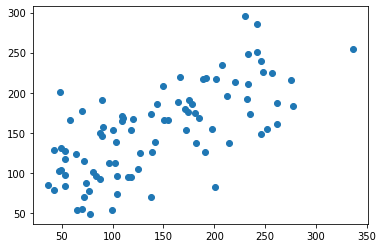

In [16]:
prediction_all = model_all.predict(x_test)
plt.scatter(y_test, prediction_all)

In [17]:
mse_2 = list(np.mean((prediction_all - y_test) ** 2))
mse_2

[2794.8851110171086]

In [18]:
better = ('A' if mse[0] < mse_2[0] else 'B')

### PODSUMOWANIE

In [19]:
print(f'MSE dla modelu "A" opartego o zmienną {choice}, która uzyskuje najlepszy wynik pomiaru regresji (R^2 = {round(x,2)}) wynosi: {round(mse[0],2)}.\n'
        f'\nMSE dla modelu "B" opartego o wszystkie dostępne zmienne wynosi {round(mse_2[0])}.\n'
        f'\nPodsumowanie: lepszy jest model "{better}"')

MSE dla modelu "A" opartego o zmienną S5, która uzyskuje najlepszy wynik pomiaru regresji (R^2 = 0.33) wynosi: 4080.56.

MSE dla modelu "B" opartego o wszystkie dostępne zmienne wynosi 2795.

Podsumowanie: lepszy jest model "B"


coeff: [[  0.08825217 -25.96003463   5.06206178   1.20729167  -1.25220878
    0.83434532   0.70646781   8.37113572  77.41916879   0.27263504]]
labels: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
pusty DF: Empty DataFrame
Columns: []
Index: []
DF z pierwszą kolumną:
   Features
0      AGE
1      SEX
2      BMI
3       BP
4       S1
5       S2
6       S3
7       S4
8       S5
9       S6
DF z dwiema kolumnami:
   Features  importance
0      AGE    0.088252
1      SEX  -25.960035
2      BMI    5.062062
3       BP    1.207292
4       S1   -1.252209
5       S2    0.834345
6       S3    0.706468
7       S4    8.371136
8       S5   77.419169
9       S6    0.272635
DF posortowany:
   Features  importance
1      SEX  -25.960035
4       S1   -1.252209
0      AGE    0.088252
9       S6    0.272635
6       S3    0.706468
5       S2    0.834345
3       BP    1.207292
2      BMI    5.062062
7       S4    8.371136
8       S5   77.419169
DF z trzema kolumnami:
   Features  importanc

Text(0.5, 0, 'Importance')

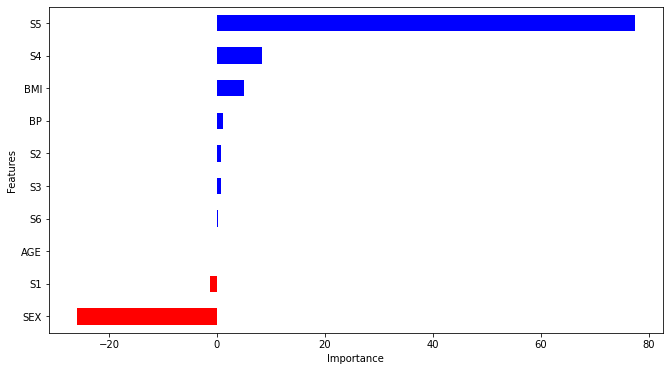

In [20]:
coeff = model_all.coef_
print(f'coeff: {coeff}') #wychodzi lista ale jako 0 index innej listy - why?
labels = list(x_train.columns)
print(f'labels: {labels}')

features = pd.DataFrame()
print(f'pusty DF: {features}')
features['Features'] = labels
print(f'DF z pierwszą kolumną:\n {features}')
features['importance'] = coeff[0]
print(f'DF z dwiema kolumnami:\n {features}')
features.sort_values(by=['importance'], ascending=True, inplace=True)
print(f'DF posortowany:\n {features}')
features['positive'] = features['importance'] > 0
print(f'DF z trzema kolumnami:\n {features}')
features.set_index('Features', inplace=True)
print(f'DF z kolumną "Features" jako indexem :\n {features}')

features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')